function ClickConnect() {
  console.log('Working')
  document
    .querySelector('#top-toolbar > colab-connect-button')
    .shadowRoot.querySelector('#connect')
    .click()
}

setInterval(ClickConnect, 60000)

## Google Drive

In [1]:
# mount google drive
from google.colab import drive
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


## Setup the environment

#### Move to the project directory

In [2]:
# go to project folder
%cd /content/gdrive/MyDrive/VisionPE/icpr-benford-gan

/content/gdrive/MyDrive/VisionPE/icpr-benford-gan


### Install dependencies

In [3]:
# setup the environment
!pip install -r ../requirements.txt
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 KB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.8/511.8 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Install pyjpeg-dct

In [4]:
# install pyjpeg
%cd "/content/gdrive/MyDrive/VisionPE/icpr-benford-gan/pyjpeg-dct"
#!rm -rf "/content/gdrive/MyDrive/VisionPE/icpr-benford-gan/pyjpeg-dct/build"
!pip install -e .

# check the module is imported correctly
import jpeg

/content/gdrive/MyDrive/VisionPE/icpr-benford-gan/pyjpeg-dct
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/gdrive/MyDrive/VisionPE/icpr-benford-gan/pyjpeg-dct
  Preparing metadata (setup.py) ... done
  Running setup.py develop for JpegPackage


In [5]:
%cd "/content/gdrive/MyDrive/VisionPE/icpr-benford-gan"

/content/gdrive/MyDrive/VisionPE/icpr-benford-gan


### Overriding model parameters

In [6]:
!cp ../params_gan.py .
!mv ./params_gan.py ./params.py

# check the first 10 rows of the params.py file just in case
!head -n 40 ./params.py

import os

root_dir = '/content/gdrive/MyDrive/VisionPE/icpr-benford-gan/'

tmp_path = '/content/gdrive/MyDrive/VisionPE/icpr-benford-gan/.temp'

# images1024x1024 dataset (original)
#images1024x1024_root = '/content/gdrive/MyDrive/VisionPE/data/images1024x1024_jpg'

# all the dataset generated will be named 'images1024x1024_orig_x_jpg'
#dataset_images1024x1024_dict =  dict((f'images1024x1024_orig_{i}_jpg', os.path.join(images1024x1024_root, f'{i * 1000:0>5d}_jpg')) for i in range(70))
#dataset_images1024x1024_ext =   dict((f'images1024x1024_orig_{i}_jpg', 'jpg') for i in range(70))
#dataset_images1024x1024_label = dict((f'images1024x1024_orig_{i}_jpg', i) for i in range(70))

# celebHQ dataset (original)
#celebAHQ_root = '/content/gdrive/MyDrive/VisionPE/data/celebAHQ/images1024x1024'
#dataset_celebAHQ_dict  = {'celebAHQ_orig': celebAHQ_root}
#dataset_celebAHQ_ext   = {'celebAHQ_orig': 'jpg'}
#dataset_celebAHQ_label = {'celebAHQ_orig': 71} # last images1024x1024 label + 1

# FaceForen

## DCT dataframe

### Workflow

#### Choose an image

In [10]:
from params import dataset_root, dataset_ext, dataset_label
from pathlib import Path
import glob
import os

# get the dataset info
dataset_key = list(dataset_root.keys())[0]
dataset_path = dataset_root.get(dataset_key)
dataset_img_ext = dataset_ext.get(dataset_key)
dataset_lbl = dataset_label[dataset_key]

# create a generator to get only the first item
gen = Path(dataset_path).glob('**/*.{}'.format(dataset_img_ext))
img_path = str(next(gen))

print('Dataset key:  {}'.format(dataset_key))
print('Dataset path: {}'.format(dataset_path))
print('Dataset ext:  {}'.format(dataset_img_ext))
print('Image path:   {}'.format(img_path))

# visualize new image
import matplotlib.pyplot as plt
%matplotlib inline

img = plt.imread(img_path)
plt.imshow(img, cmap='gray');

StopIteration: ignored

#### Test JPEG conversion



/content/gdrive/MyDrive/VisionPE/data/images1024x1024_jpg/00000_jpg/00000.jpg -> /content/gdrive/MyDrive/VisionPE/icpr-benford-gan/.temp/6ef136b3b2d347e9ba87241bbc99b72e.jpg


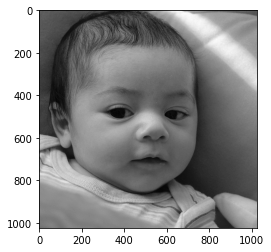

In [ ]:
from params import tmp_path
import numpy as np
from PIL import Image
import os
import io
import cv2
import uuid

# open the image
if img_path.split('.')[-1] == 'webp':
  img = Image.fromarray(cv2.imread(img_path))
else:
  img = Image.open(img_path).convert('L')

# create a tmp copy of the image saved sas jpg
tmp_name = uuid.uuid4().hex + '.jpg' # create a name using MAC address and current timestamp
new_path = os.path.join(tmp_path, tmp_name)

quality_factor = 85 # [85, 100]
with open(new_path, 'wb') as tmp_file:
  img.save(tmp_file, 'JPEG', quality=quality_factor)
  tmp_file.flush()
  os.fsync(tmp_file)

# now you should use new_path that is the path of the image compressed as jpeg
print('{} -> {}'.format(img_path, new_path))

# visualize new image
import matplotlib.pyplot as plt
%matplotlib inline

img = plt.imread(new_path)
plt.imshow(img, cmap='gray');

#### Test DCT extraction

In [ ]:
import jpeg
import numpy as np

def get_blocks(img_path):
    # Params
    b = 8
    # Block-wise 2D-DCT (Luma only)
    img = jpeg.Jpeg(img_path)
    xmax, ymax = img.getcomponentdimensions(0)
    blocks_dct = np.zeros((xmax * ymax, b, b))
    cnt = 0
    for y in range(ymax):
        for x in range(xmax):
            block = img.getblock(x, y, 0)
            blocks_dct[cnt, :, :] = np.frombuffer(block, dtype=np.int16).reshape((8, 8))
            cnt += 1
    return blocks_dct

# try the dct extraction with the image
img_dct = get_blocks(new_path)

# print first block
print('Result shape: {}'.format(img_dct.shape))
print('First block:  {}'.format(img_dct[0]))

Result shape: (16384, 8, 8)
First block:  [[-57.   2.   0.  -2.   0.   0.   0.   0.]
 [  0.   1.   0.   0.   0.   0.   0.   0.]
 [  1.   2.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  1.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]]


#### Zig zag ordering

In [ ]:
# vectorize and remove DC
img_dct = img_dct.reshape(-1, 64) # reshape the blocks to have size (1x64)

zig_zag_idx = np.asarray([0, 1, 5, 6, 14, 15, 27, 28, 2, 4, 7, 13, 16, 26, 29, 42,
                          3, 8, 12, 17, 25, 30, 41, 43, 9, 11, 18, 24, 31, 40, 44, 53,
                          10, 19, 23, 32, 39, 45, 52, 54, 20, 22, 33, 38, 46, 51, 55, 60,
                          21, 34, 37, 47, 50, 56, 59, 61, 35, 36, 48, 49, 57, 58, 62, 63])

# reordering in zig zag order
reordered_img_dct = img_dct[:, zig_zag_idx]

print('Before ordering: {}'.format(img_dct[0]))
print('After ordering:  {}'.format(reordered_img_dct[0]))

Before ordering: [-57.   2.   0.  -2.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.
   0.   0.   1.   2.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.]
After ordering:  [-57.   2.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.
   0.   0.  -2.   0.   0.   2.   0.   0.   0.   0.   1.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.]


#### Test drop frequencies

In [ ]:
drop = 10 # drops last 10 frequencies

# vectorize and remove DC
img_dct = img_dct.reshape(-1, 64) # reshape the blocks to have size (1x64)

zig_zag_idx = np.asarray([0, 1, 5, 6, 14, 15, 27, 28, 2, 4, 7, 13, 16, 26, 29, 42,
                          3, 8, 12, 17, 25, 30, 41, 43, 9, 11, 18, 24, 31, 40, 44, 53,
                          10, 19, 23, 32, 39, 45, 52, 54, 20, 22, 33, 38, 46, 51, 55, 60,
                          21, 34, 37, 47, 50, 56, 59, 61, 35, 36, 48, 49, 57, 58, 62, 63])

# reordering in zig zag order
reordered_img_dct = img_dct[:, zig_zag_idx]

# drop some frequencies
reordered_img_dct_dropout = reordered_img_dct[:, : 64 - drop]

print('Before ordering: {}\nlen: {}\n'.format(img_dct[0], len(img_dct[0])))
print('After ordering:  {}\nlen: {}\n'.format(reordered_img_dct[0], len(reordered_img_dct[0])))
print('After dropout:   {}\nlen: {}'.format(reordered_img_dct_dropout[0], len(reordered_img_dct_dropout[0])))

Before ordering: [-57.   2.   0.  -2.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.
   0.   0.   1.   2.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.]
len: 64

After ordering:  [-57.   2.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.
   0.   0.  -2.   0.   0.   2.   0.   0.   0.   0.   1.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.]
len: 64

After dropout:   [-57.   2.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.
   0.   0.  -2.   0.   0.   2.   0.   0.   0.   0.   1.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
len:

#### Test dataframe entry

In [ ]:
first_block = img_dct[0]
first_block_reordered = reordered_img_dct[0]
first_block_reordered_dropout = reordered_img_dct_dropout[0]

data = first_block_reordered

y = -1 # if you read -1 you should check the names of the databases
if '_orig' in dataset_key:
  y = 0
elif '_gan' in dataset_key:
  y = 1

dataframe_entry = np.append(data, [y, dataset_lbl])
print(dataframe_entry)

[-57.   2.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.
   0.   0.  -2.   0.   0.   2.   0.   0.   0.   0.   1.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.]


#### Clean the temp variables

In [ ]:
from params import tmp_path
import glob

tmp_file_list = glob.glob(os.path.join(tmp_path, '*.jpg'))
[os.remove(x) for x in tmp_file_list]


[None]

### Putting it all together

#### Convert non jpg dataset to jpg

##### images1024x1024

In [ ]:
import pandas as pd
from params import dataset_root, dataset_ext, results_root, dataset_label, tmp_path
import numpy as np
from PIL import Image
import jpeg
import os
import io
import cv2
import tqdm
import uuid

do_you_want_to_do_this = False

if do_you_want_to_do_this:

  dataset_path = '/content/gdrive/MyDrive/VisionPE/data/images1024x1024'
  subfolders = [os.path.join(dataset_path, f'{i * 1000:0>5d}') for i in range(70)]

  new_dataset_path = '/content/gdrive/MyDrive/VisionPE/data/images1024x1024_jpg'
  new_subfolders = [os.path.join(new_dataset_path, f'{i * 1000:0>5d}_jpg') for i in range(70)]

  os.mkdir(new_dataset_path)

  for i in range(len(subfolders)):

    subfolder = subfolders[i]
    new_subfolder = new_subfolders[i]

    os.mkdir(new_subfolder)

    print('Converting images in dataset {} to jpg'.format(subfolder))

    for image_name in tqdm.tqdm(os.listdir(subfolder)):

      old_image_path = os.path.join(subfolder, image_name)
      #print(old_image_path)

      name = image_name.split('.')[-2]
      ext = image_name.split('.')[-1]

      # create a tmp copy of the image saved as jpg
      new_image_name = name + '.jpg'
      new_image_path = os.path.join(new_subfolder, new_image_name)

      if not os.path.exists(new_image_path):

        # open the image
        if ext == 'webp':
          img = Image.fromarray(cv2.imread(old_image_path))
        else:
          img = Image.open(old_image_path).convert('L')

        quality_factor = 85 # [85, 100]
        with open(new_image_path, 'wb') as image:
          img.save(image, 'JPEG', quality=quality_factor)
          image.flush()
          os.fsync(image)
    

##### FaceForensics

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
import jpeg
import os
import io
import cv2
import tqdm
import uuid
from pathlib import Path

do_you_want_to_do_this = False

if do_you_want_to_do_this:

  dataset_path = '/content/gdrive/MyDrive/VisionPE/data/FaceForensics_Images/images'

  new_dataset_path = '/content/gdrive/MyDrive/VisionPE/data/FaceForensics_Images_jpg/images_jpg'

  Path(new_dataset_path).mkdir(exist_ok=True, parents=True)

  print('Converting images in dataset {} to jpg'.format(dataset_path))

  for image_name in tqdm.tqdm(os.listdir(dataset_path)):

    old_image_path = os.path.join(dataset_path, image_name)
    #print(old_image_path)

    name = image_name.split('.')[-2]
    ext = image_name.split('.')[-1]

    # create a tmp copy of the image saved as jpg
    new_image_name = name + '.jpg'
    new_image_path = os.path.join(new_dataset_path, new_image_name)

    if not os.path.exists(new_image_path):

      # open the image
      if ext == 'webp':
        img = Image.fromarray(cv2.imread(old_image_path))
      else:
        img = Image.open(old_image_path).convert('L')

      quality_factor = 85 # [85, 100]
      with open(new_image_path, 'wb') as image:
        img.save(image, 'JPEG', quality=quality_factor)
        image.flush()
        os.fsync(image)
  

##### StylegGAN2

In [25]:
import pandas as pd
import numpy as np
from PIL import Image
import jpeg
import os
import io
import cv2
import tqdm
import uuid
from pathlib import Path
import glob

old_dataset_path = '/content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0'
old_subfolders = [os.path.join(dataset_path, f'{i * 1000:0>6d}') for i in range(70)]

new_dataset_path = '/content/gdrive/MyDrive/VisionPE/data/StyleGAN2_jpg'
new_subfolders = [os.path.join(new_dataset_path, f'{i * 1000:0>6d}_jpg') for i in range(70)]

for i in range(len(old_subfolders)):

  old_subfolder = old_subfolders[i]
  new_subfolder = new_subfolders[i]

  # create the new path
  Path(new_subfolder).mkdir(exist_ok=True, parents=True)

  print('Converting images in dataset {}'.format(old_subfolder))

  for f in glob.glob(old_subfolder + '/*.png'):
    print(f)
    break


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/000000
/content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/000000/000001.png
Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/001000
/content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/001000/001001.png
Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/002000
/content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/002000/002001.png
Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/sty

In [30]:
import pandas as pd
import numpy as np
from PIL import Image
import jpeg
import os
import io
import cv2
import tqdm
import uuid
from pathlib import Path
import glob

old_dataset_path = '/content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0'
old_subfolders = [os.path.join(dataset_path, f'{i * 1000:0>6d}') for i in range(100)]

new_dataset_path = '/content/gdrive/MyDrive/VisionPE/data/StyleGAN2_jpg'
new_subfolders = [os.path.join(new_dataset_path, f'{i * 1000:0>6d}_jpg') for i in range(100)]


for i in range(len(old_subfolders)):

  old_subfolder = old_subfolders[i]
  new_subfolder = new_subfolders[i]

  # create the new path
  Path(new_subfolder).mkdir(exist_ok=True, parents=True)

  print('Converting images in dataset {}'.format(old_subfolder))

  for old_image_path in tqdm.tqdm(glob.glob(old_subfolder + '/*.png')):

    old_image_path_str = old_image_path.replace('/', '.').split('.')
    old_image_name = old_image_path_str[-2]
    old_image_ext = old_image_path_str[-1]

    # create a tmp copy of the image saved as jpg
    new_image_name = old_image_name + '.jpg'
    new_image_path = os.path.join(new_subfolder, new_image_name)

    if not os.path.exists(new_image_path):

      # open the image
      if ext == 'webp':
        img = Image.fromarray(cv2.imread(old_image_path))
      else:
        img = Image.open(old_image_path).convert('L')

      quality_factor = 100 # [85, 100]
      with open(new_image_path, 'wb') as image:
        img.save(image, 'JPEG', quality=quality_factor)
        image.flush()
        os.fsync(image)

Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/000000


100%|██████████| 1000/1000 [00:00<00:00, 2674.32it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/001000


100%|██████████| 1000/1000 [03:04<00:00,  5.42it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/002000


100%|██████████| 1000/1000 [02:35<00:00,  6.42it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/003000


100%|██████████| 1000/1000 [02:37<00:00,  6.36it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/004000


100%|██████████| 1000/1000 [02:36<00:00,  6.39it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/005000


100%|██████████| 1000/1000 [02:40<00:00,  6.24it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/006000


100%|██████████| 1000/1000 [02:50<00:00,  5.87it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/007000


100%|██████████| 1000/1000 [03:18<00:00,  5.03it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/008000


100%|██████████| 1000/1000 [02:39<00:00,  6.26it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/009000


100%|██████████| 1000/1000 [02:35<00:00,  6.41it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/010000


100%|██████████| 1000/1000 [02:36<00:00,  6.38it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/011000


100%|██████████| 1000/1000 [02:34<00:00,  6.46it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/012000


100%|██████████| 1000/1000 [04:09<00:00,  4.01it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/013000


100%|██████████| 1000/1000 [02:34<00:00,  6.46it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/014000


100%|██████████| 1000/1000 [02:50<00:00,  5.87it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/015000


100%|██████████| 1000/1000 [02:42<00:00,  6.17it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/016000


100%|██████████| 1000/1000 [02:39<00:00,  6.25it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/017000


100%|██████████| 1000/1000 [03:24<00:00,  4.89it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/018000


100%|██████████| 1000/1000 [03:21<00:00,  4.97it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/019000


100%|██████████| 1000/1000 [02:35<00:00,  6.43it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/020000


100%|██████████| 1000/1000 [02:38<00:00,  6.32it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/021000


100%|██████████| 1000/1000 [02:38<00:00,  6.30it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/022000


100%|██████████| 1000/1000 [02:43<00:00,  6.11it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/023000


100%|██████████| 1000/1000 [02:38<00:00,  6.32it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/024000


100%|██████████| 1000/1000 [03:03<00:00,  5.46it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/025000


100%|██████████| 1000/1000 [02:37<00:00,  6.35it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/026000


100%|██████████| 1000/1000 [06:21<00:00,  2.62it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/027000


100%|██████████| 1000/1000 [02:34<00:00,  6.45it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/028000


100%|██████████| 1000/1000 [02:42<00:00,  6.14it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/029000


100%|██████████| 1000/1000 [03:02<00:00,  5.49it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/030000


100%|██████████| 1000/1000 [02:36<00:00,  6.41it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/031000


100%|██████████| 1000/1000 [02:39<00:00,  6.26it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/032000


100%|██████████| 1000/1000 [02:44<00:00,  6.08it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/033000


100%|██████████| 1000/1000 [02:36<00:00,  6.38it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/034000


100%|██████████| 1000/1000 [02:39<00:00,  6.28it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/035000


100%|██████████| 1000/1000 [02:30<00:00,  6.63it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/036000


100%|██████████| 1000/1000 [02:50<00:00,  5.88it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/037000


100%|██████████| 1000/1000 [02:34<00:00,  6.45it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/038000


100%|██████████| 1000/1000 [02:39<00:00,  6.28it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/039000


100%|██████████| 1000/1000 [02:40<00:00,  6.22it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/040000


100%|██████████| 1000/1000 [02:49<00:00,  5.89it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/041000


100%|██████████| 1000/1000 [02:32<00:00,  6.56it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/042000


100%|██████████| 1000/1000 [10:55<00:00,  1.53it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/043000


100%|██████████| 1000/1000 [02:44<00:00,  6.07it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/044000


100%|██████████| 1000/1000 [02:43<00:00,  6.13it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/045000


100%|██████████| 1000/1000 [02:52<00:00,  5.78it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/046000


100%|██████████| 1000/1000 [02:37<00:00,  6.35it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/047000


100%|██████████| 1000/1000 [02:49<00:00,  5.90it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/048000


100%|██████████| 1000/1000 [02:43<00:00,  6.12it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/049000


100%|██████████| 1000/1000 [02:53<00:00,  5.75it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/050000


100%|██████████| 1000/1000 [02:39<00:00,  6.27it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/051000


100%|██████████| 1000/1000 [06:14<00:00,  2.67it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/052000


100%|██████████| 1000/1000 [12:55<00:00,  1.29it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/053000


100%|██████████| 1000/1000 [02:54<00:00,  5.72it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/054000


100%|██████████| 1000/1000 [05:22<00:00,  3.10it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/055000


100%|██████████| 1000/1000 [02:38<00:00,  6.30it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/056000


100%|██████████| 1000/1000 [03:29<00:00,  4.77it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/057000


100%|██████████| 1000/1000 [02:42<00:00,  6.15it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/058000


100%|██████████| 1000/1000 [02:50<00:00,  5.86it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/059000


100%|██████████| 1000/1000 [02:38<00:00,  6.32it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/060000


100%|██████████| 1000/1000 [04:17<00:00,  3.89it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/061000


100%|██████████| 1000/1000 [02:49<00:00,  5.90it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/062000


100%|██████████| 1000/1000 [02:40<00:00,  6.23it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/063000


100%|██████████| 1000/1000 [02:57<00:00,  5.63it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/064000


100%|██████████| 1000/1000 [02:40<00:00,  6.22it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/065000


100%|██████████| 1000/1000 [02:56<00:00,  5.68it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/066000


100%|██████████| 1000/1000 [02:39<00:00,  6.26it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/067000


100%|██████████| 1000/1000 [03:01<00:00,  5.52it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/068000


100%|██████████| 1000/1000 [02:47<00:00,  5.98it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/069000


100%|██████████| 1000/1000 [02:52<00:00,  5.81it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/070000


100%|██████████| 1000/1000 [02:45<00:00,  6.02it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/071000


100%|██████████| 1000/1000 [02:49<00:00,  5.88it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/072000


100%|██████████| 1000/1000 [03:49<00:00,  4.35it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/073000


100%|██████████| 1000/1000 [03:01<00:00,  5.51it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/074000


100%|██████████| 1000/1000 [03:03<00:00,  5.46it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/075000


100%|██████████| 1000/1000 [03:18<00:00,  5.04it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/076000


100%|██████████| 1000/1000 [02:55<00:00,  5.71it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/077000


100%|██████████| 1000/1000 [03:05<00:00,  5.38it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/078000


100%|██████████| 1000/1000 [02:43<00:00,  6.11it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/079000


100%|██████████| 1000/1000 [02:59<00:00,  5.57it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/080000


100%|██████████| 1000/1000 [02:48<00:00,  5.94it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/081000


100%|██████████| 1000/1000 [02:58<00:00,  5.61it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/082000


100%|██████████| 1000/1000 [02:43<00:00,  6.12it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/083000


100%|██████████| 1000/1000 [02:56<00:00,  5.66it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/084000


100%|██████████| 1000/1000 [02:49<00:00,  5.89it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/085000


100%|██████████| 1000/1000 [07:31<00:00,  2.21it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/086000


100%|██████████| 1000/1000 [02:51<00:00,  5.84it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/087000


100%|██████████| 1000/1000 [02:41<00:00,  6.18it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/088000


100%|██████████| 1000/1000 [02:55<00:00,  5.69it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/089000


100%|██████████| 1000/1000 [02:43<00:00,  6.11it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/090000


100%|██████████| 1000/1000 [03:02<00:00,  5.49it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/091000


100%|██████████| 1000/1000 [02:42<00:00,  6.14it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/092000


100%|██████████| 1000/1000 [02:53<00:00,  5.75it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/093000


100%|██████████| 1000/1000 [02:55<00:00,  5.70it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/094000


100%|██████████| 1000/1000 [02:54<00:00,  5.74it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/095000


100%|██████████| 1000/1000 [02:38<00:00,  6.31it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/096000


100%|██████████| 1000/1000 [02:55<00:00,  5.69it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/097000


100%|██████████| 1000/1000 [03:09<00:00,  5.29it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/098000


100%|██████████| 1000/1000 [02:44<00:00,  6.09it/s]


Converting images in dataset /content/gdrive/MyDrive/VisionPE/data/StyleGAN2/images/100k-generated-images/ffhq-1024x1024/stylegan2-config-f-psi-1.0/099000


100%|██████████| 1000/1000 [04:04<00:00,  4.09it/s]


#### Split 100k images in 100 subfolders (StyleGAN2)

In [ ]:
# split the 100k images in 100 folders
%%bash

dir_size=1000
dir_name="folder"
current_dir=$(pwd)
n=$((`find . -maxdepth 1 -type f | wc -l`/$dir_size+1))
for i in `seq 1 $n`;
do
    echo "Putting $dir_size images in $current_dir/$dir_name$i"
    mkdir -p "$dir_name$i";
    find . -maxdepth 1 -type f | head -n $dir_size | xargs -i mv "{}" "$dir_name$i"
done

### Generate dataframe

In [ ]:
import pandas as pd
from params import dataset_root, dataset_ext, results_root, dataset_label, tmp_path
import numpy as np
from PIL import Image
import jpeg
import os
import io
import cv2
import tqdm
import uuid

def get_blocks(img_path):
    # Params
    b = 8
    # Block-wise 2D-DCT (Luma only)
    img = jpeg.Jpeg(img_path)
    xmax, ymax = img.getcomponentdimensions(0)
    blocks_dct = np.zeros((xmax * ymax, b, b))
    cnt = 0
    for y in range(ymax):
        for x in range(xmax):
            block = img.getblock(x, y, 0)
            blocks_dct[cnt, :, :] = np.frombuffer(block, dtype=np.int16).reshape((8, 8))
            cnt += 1
    return blocks_dct

zig_zag_idx = np.asarray([0, 1, 5, 6, 14, 15, 27, 28, 2, 4, 7, 13, 16, 26, 29, 42,
                          3, 8, 12, 17, 25, 30, 41, 43, 9, 11, 18, 24, 31, 40, 44, 53,
                          10, 19, 23, 32, 39, 45, 52, 54, 20, 22, 33, 38, 46, 51, 55, 60,
                          21, 34, 37, 47, 50, 56, 59, 61, 35, 36, 48, 49, 57, 58, 62, 63])

def generate_dataframe():

  ### ERROR in this function

  for dataset in dataset_root.keys():

    dataset_path = dataset_root[dataset]
    dataset_lbl = dataset_label[dataset]
    dataset_img_ext = dataset_ext[dataset]

    name = '{}.csv'.format(dataset)
    filepath = os.path.join(results_root, 'dataframes_dct', name)
    # save the dataframe generated from this dataset
    columns = np.concatenate(
        (np.array(['dct_{}'.format(i) for i in range(64)]),
        np.array(['y', 'dataset_label']))
    )

    if not os.path.exists(filepath):

      print('Generating DCTs from dataset {}'.format(dataset))

      # all images should be jpg
      for image_name in tqdm.tqdm(os.listdir(dataset_path)):
        
        image_path = os.path.join(dataset_path, image_name)

        # try the dct extraction with the image
        img_dct = get_blocks(image_path)

        # vectorize and remove DC
        img_dct = img_dct.reshape(-1, 64) # reshape the blocks to have size (1x64)
        
        # reordering in zig zag order
        img_dct = img_dct[:, zig_zag_idx]

        y = -1 # if you read -1 you should check the names of the databases
        if '_orig' in dataset:
          y = 0
        elif '_gan' in dataset:
          y = 1
        print(img_dct.shape)
        dataframe_entry = np.append(img_dct, [y, dataset_lbl])

        # creating dataframe
        df = pd.DataFrame(dataframe_entry, columns)
        df.to_csv(filepath, mode='a', index=False)

    else:
      print('Dataframe already exists, skipping...')


## Original dataframe

### Visualize step 3 output

In [ ]:
import pandas as pd
import os
from params import coeff_list, base_list, compression_list
from params import fd_hist_root, features_div_root
from pathlib import Path

# create a generator to get only the first item
gen = sorted(Path(features_div_root).glob('**/*.pkl'))
pkl_path = str(gen[0])

# columns=['mse', 'popt_0', 'popt_1', 'popt_2', 'kl', 'reny', 'tsallis']
ff_df = pd.read_pickle(pkl_path)

print(ff_df)

### Extract features

In [ ]:
from functions import get_params_range, load_features
from params import features_div_root, results_root
import pandas as pd
import tqdm

# suppress warnings
import warnings
warnings.filterwarnings("ignore", message=r"Passing", category=FutureWarning)

all_params_range = get_params_range()
features_div_dir = features_div_root # changes with recompression flag enabled
subsampling = 0.03 # default subsamplig value

basepath = os.path.join(results_root, 'dataframes_classic')
# create the full directory tree, if needed:
os.makedirs(basepath, exist_ok=True)

for comp, base, coeff in tqdm.tqdm(all_params_range):

  # maybe only taking into account the cases in which coeff contains 
  # all the digits from 1 up to 9 is more informative, we should discard
  # the others (?)

  name = 'dataframe_comp_{}_base_{}_coeff_{}.csv'.format(comp[0], base[0], coeff)
  filepath = os.path.join(basepath, name)

  if not os.path.exists(filepath):
    print('Saving {}'.format(name))

    ff_list, y_list, y_logo_list = load_features(comp, base, coeff, features_div_dir)

    # save the whole dataset for this value of comp, base, coeff
    df = pd.DataFrame({'kl': ff_list[:, 0], 'reny': ff_list[:, 1], 'tsallis': ff_list[:, 2], 'y':y_list, 'dataset_label':y_logo_list})
    df.to_csv(filepath, index=False)

  else:
    print('{} already exists, skipping...'.format(name))

